## 3. Calidad de un vino

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.losses import sparse_categorical_crossentropy
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from sklearn.svm import SVC as SVM
from sklearn.decomposition import PCA

Using TensorFlow backend.


### (a) Carge los dos dataset en un único dataframe de pandas, además de agregar una columna indicando si es vino tinto o blanco. Describa el dataset a trabajar.

In [2]:
df_red = pd.read_csv("dataset3/winequality-red.csv",sep=";")
df_red['type'] = 0
df_white = pd.read_csv("dataset3/winequality-white.csv",sep=";")
df_white['type'] = 1
df = pd.concat([df_red,df_white], axis=0)
df.info()
pd.value_counts(df['quality'].values, sort=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


4     216
8     193
5    2138
9       5
6    2836
3      30
7    1079
dtype: int64

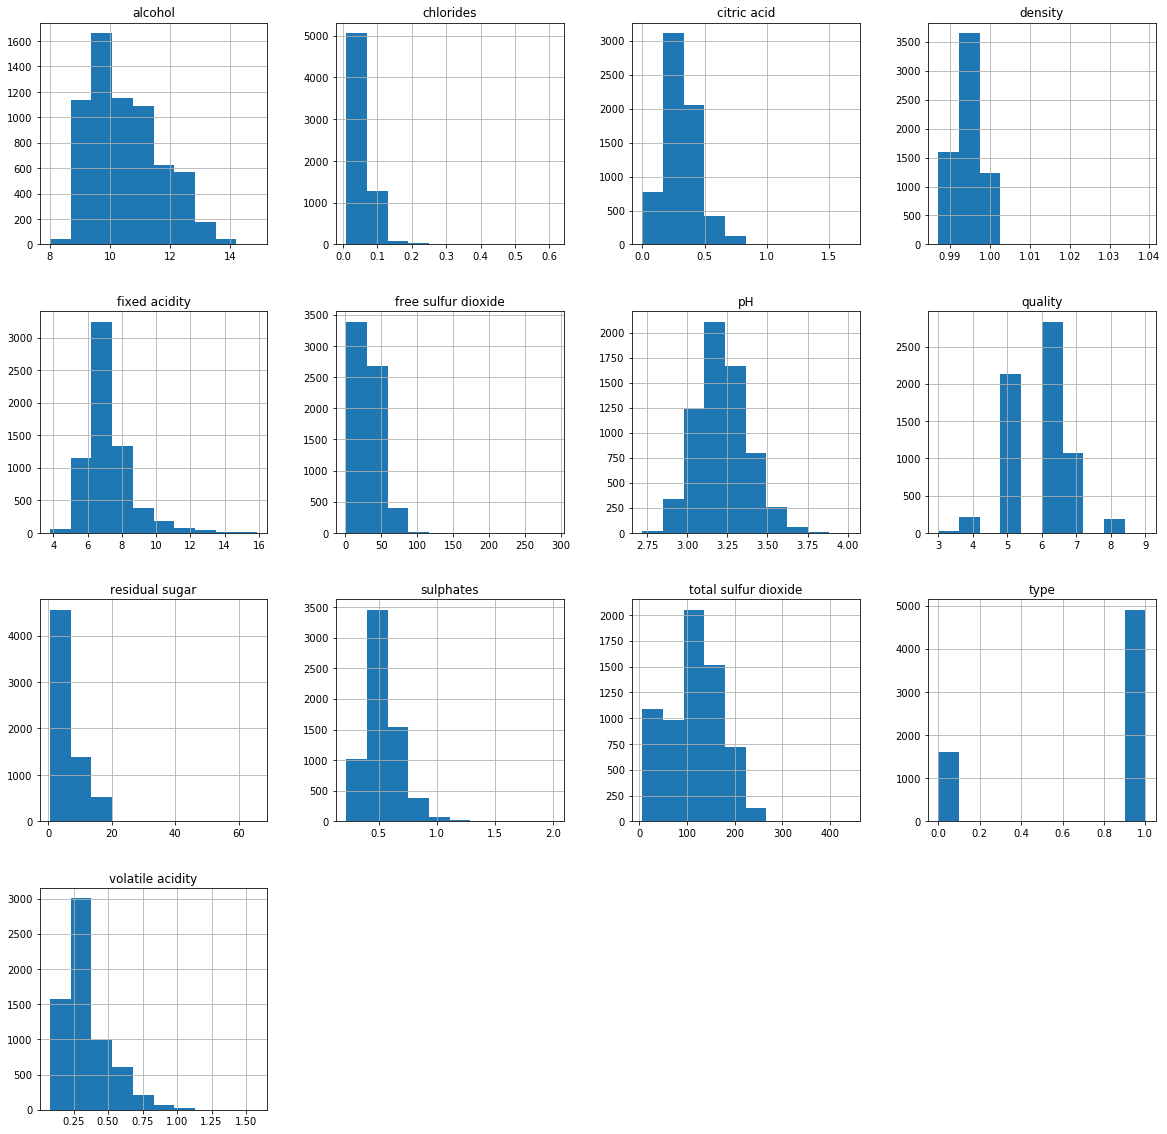

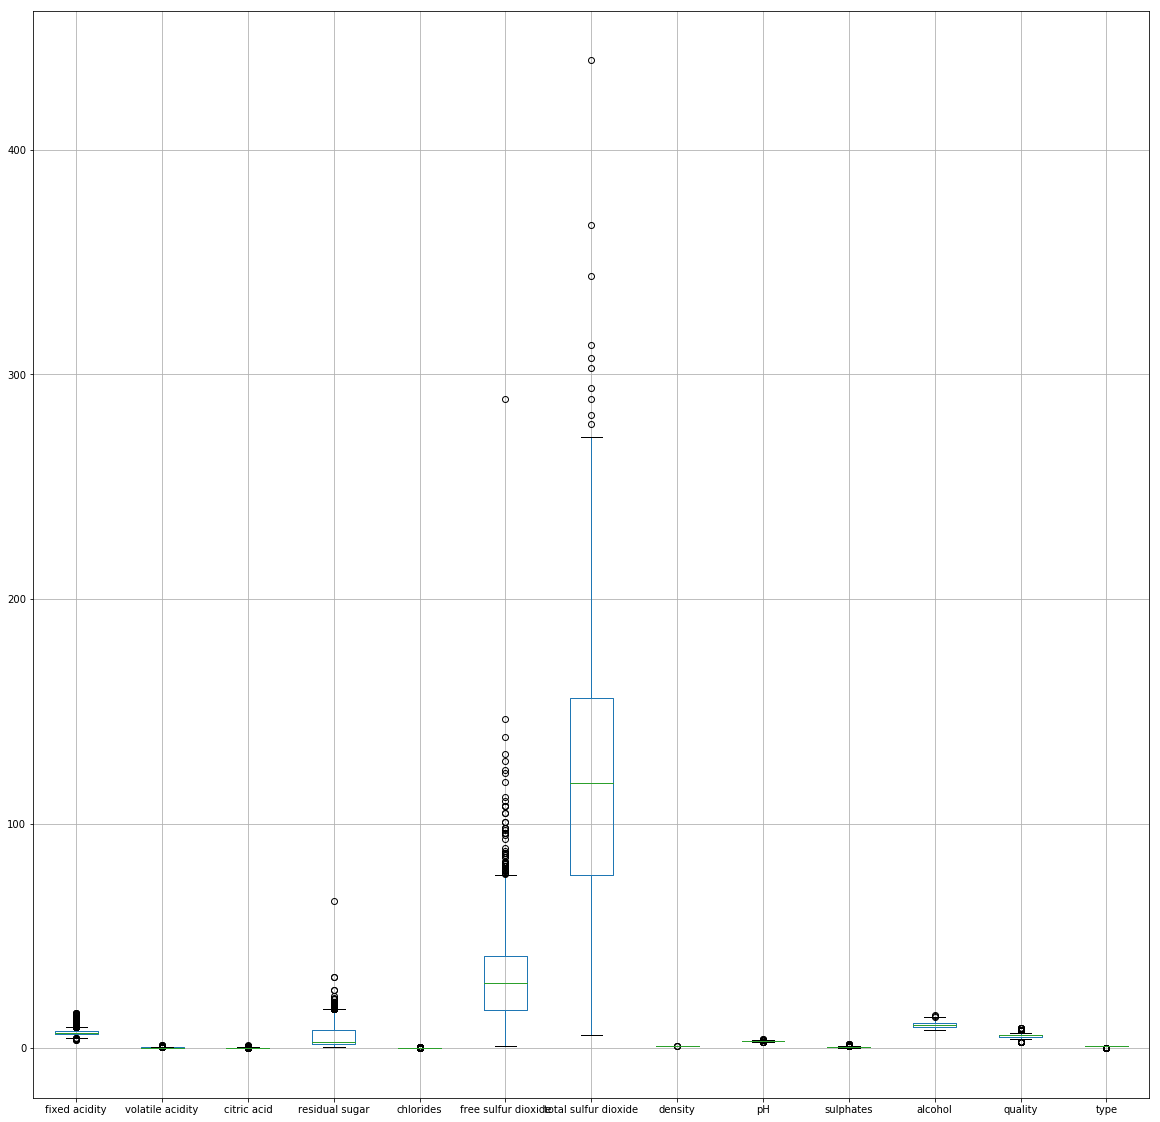

In [3]:
df.hist(figsize=(20,20))
plt.show()
df.boxplot(figsize=(20,20))
plt.show()

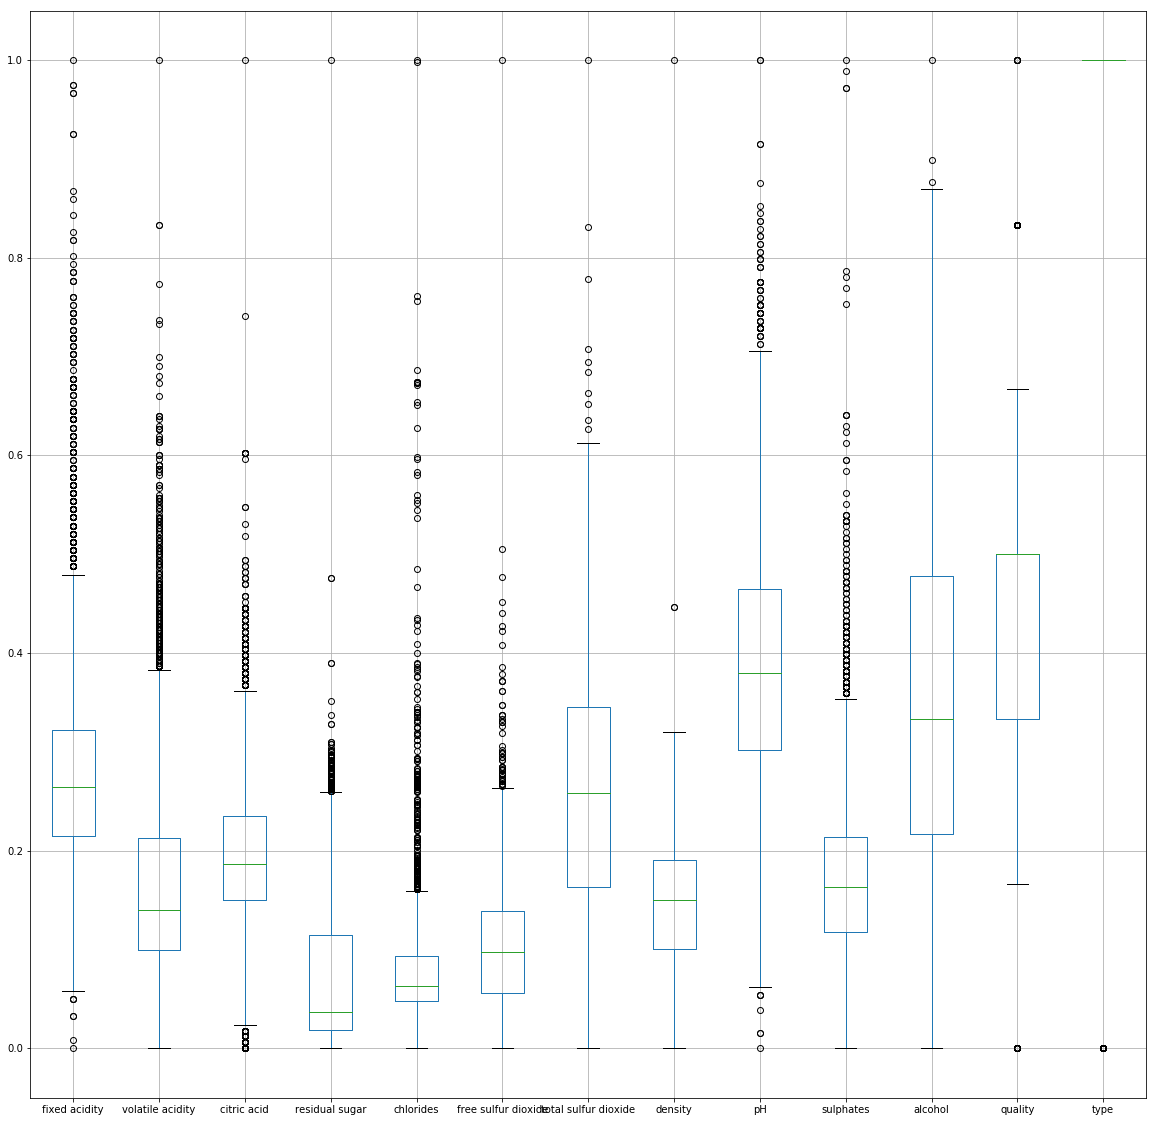

In [4]:
df_columns = df.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df_scaled = pd.DataFrame(np_scaled)
df_scaled.columns = df_columns
df_scaled.boxplot(figsize=(20,20))
plt.show()

#### Observación
Se agragó la columna "type" donde 0 es tinto y 1 es blanco. Se observa que el dataset no contiene valores de calidad menores que 3 y que la mayoría se ubica entre 5 y 7. Además existe una gran diferencia entre una categoría y otra, pudiendo afectar el proceso de aprendizaje.

### (b) Aborde este problema como si fuera de clasificación binaria para predecir si un vino es de buena calidad o no, es decir, utilice las distintas características fisioquímicas presentes en los datos para estimar esta etiqueta. Para esto cree las matrices de entrenamiento y de pruebas, además de la etiqueta para ambos conjuntos, considerando como quality mayor a 5 un vino de buena calidad. El conjunto de pruebas (25 %) será utilizado únicamente para verificar la calidad de los algoritmos a entrenar.

In [5]:
#Create sets
df_scaled['good_quality'] = [1.0 if q>=0.5 else 0.0 for q in df_scaled.quality]
df['good_quality'] = [1 if q>5 else 0 for q in df.quality]
df_no_quality = df.drop('quality',1)
dfs_no_quality = df_scaled.drop('quality',1)

print(pd.value_counts(df_no_quality['good_quality'].values, sort=False))
print(pd.value_counts(dfs_no_quality['good_quality'].values, sort=False))

y = df_no_quality.pop('good_quality')
X = df_no_quality
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.266, random_state=42)

ys = dfs_no_quality.pop('good_quality')
Xs = dfs_no_quality
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.25, random_state=42)
Xs_train, Xs_val, ys_train, ys_val = train_test_split(Xs_train, ys_train, test_size=0.266, random_state=42)

0    2384
1    4113
dtype: int64
0.0    2384
1.0    4113
dtype: int64


#### Observación
Cabe destacar la diferencia existente entre la categoría "buena calidad", 1, y mala calidad, 0. Lo cual puede afectar posteriormente la calidad de la máquina. Se investigaron los atributos del vino aprendiendo que gran parte de la calidad depende del ph y de la cantidad de alcohol. A modo de análisis previo y comprobación de esto, se graficó la dependencia del ph con el nivel de alcohol, dando cuenta que este par de atributos separa de mejor forma las clases. Esto podría se útil más adelante.

### (c) Entrene un solo Árbol de Clasificación de múltiples niveles para resolver el problema. Puede variar los hiper-parámetros que prefiera. Recuerde que las decisiones no pueden ser basadas mirando el conjunto de pruebas, debido al desbalanceo que se produce en las dos clases mida la métrica F1-score [5] sobre el conjunto de entrenamiento y de pruebas.

In [6]:
# Función que escoge parámetros óptimos

rs=20
md=50
mss=50
df1=0

#for j in range(1, md):
#    for k in range(2, mss):
#        tree_c = Tree(criterion = "entropy", random_state = rs, max_depth=j, min_samples_split=k)
#        tree_c.fit(X_train, y_train)
#        f1 = f1_score(y_val, tree_c.predict(X_val))
#        if (f1>df1):
#            df1 = f1
#            print("Entropy %d %d %d %f" % (rs, j, k, df1))
#        tree_c = Tree(criterion = "gini", random_state = rs, max_depth=j, min_samples_split=k)
#        tree_c.fit(X_train, y_train)
#        f1 = f1_score(y_val, tree_c.predict(X_val))
#        if (f1>df1):
#            df1 = f1
#            print("Gini %d %d %d %f" % (rs, j, k, df1))

In [7]:
tree_c = Tree(criterion = "entropy", random_state = rs, max_depth=15, min_samples_split=3)
tree_c.fit(X_train, y_train)
print(classification_report(y_train, tree_c.predict(X_train)))

tree_c = Tree(criterion = "entropy", random_state = rs, max_depth=15, min_samples_split=3)
tree_c.fit(X_train, y_train)
print(classification_report(y_test, tree_c.predict(X_test)))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1349
          1       0.99      0.99      0.99      2227

avg / total       0.98      0.98      0.98      3576

             precision    recall  f1-score   support

          0       0.62      0.66      0.64       584
          1       0.80      0.77      0.79      1041

avg / total       0.73      0.73      0.73      1625



#### Respuesta

Se realizó una función que escogió los mejores parámetros basado en el f1Score del conjunto de entrenamiento. A partir de el se llegó a que la profundidad debía ser 18 y que el número mínimo de elementos por corte debía ser 2. Una vez hecho esto, se obtuvo un reporte de clasificación para el conjunto de entrenamiento y el de pruebas.

Se observa que dada la cantidad menor de ejemplos para la clase 0 (baja calidad), su f1Score es menor, mientras que para la clase 1 (alta calidad) esta estadística es mejor. Esto se debe a que hay una mayor cantidad de ejemplos en ese caso.

Se hace patente una gran diferencia entre el conjunto de training y test, dando a entender la existencia de overfitting.

### (d) Entrene un ensamblador de árboles de múltiples niveles, mediante la técnica de Random Forest. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (n estimators), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.

In [8]:
# Función que escoge parámetros óptimos

rs=20
md=50
mss=50
df1=0

#for md in range(1,20):
#    for ne in range(1,100):
#        model = RandomForestClassifier(n_estimators=ne, random_state=rs, max_depth=md, n_jobs=-1)
#        model.fit(X_train, y_train)
#        s = f1_score(y_val, model.predict(X_val))
#        if (s>df1):
#            df1 = s
#            print("RF %d %d %d %f" % (rs, md, ne, df1))

RF 1 20 0.914478
RF 2 20 0.903054
RF 3 20 0.959532
RF 4 20 0.961494
RF 5 20 0.980304
RF 6 20 0.982289
RF 7 20 0.989474
RF 8 20 0.990751
RF 9 20 0.992606
RF 10 20 0.993023
RF 11 20 0.993496
RF 12 20 0.995280
RF 13 20 0.995293
RF 14 20 0.996181
RF 15 20 0.997083
RF 16 20 0.996853
RF 17 20 0.998205
RF 18 20 0.997978
RF 19 20 0.998429
RF 20 20 0.998428
RF 21 20 0.998878
RF 22 20 0.999102
RF 23 20 0.999103
RF 24 20 0.999551
RF 25 20 0.999551
RF 26 20 0.999551
RF 27 20 0.999327
RF 28 20 0.999551
RF 29 20 0.999103
RF 30 20 0.999551
RF 31 20 0.999776
RF 32 20 1.000000
RF 33 20 0.999776
RF 34 20 1.000000
RF 35 20 0.999776
RF 36 20 1.000000
RF 37 20 0.999776
RF 38 20 1.000000
RF 39 20 1.000000
RF 40 20 1.000000
RF 41 20 1.000000
RF 42 20 1.000000
RF 43 20 1.000000
RF 44 20 1.000000
RF 45 20 1.000000
RF 46 20 1.000000
RF 47 20 1.000000
RF 48 20 1.000000
RF 49 20 1.000000


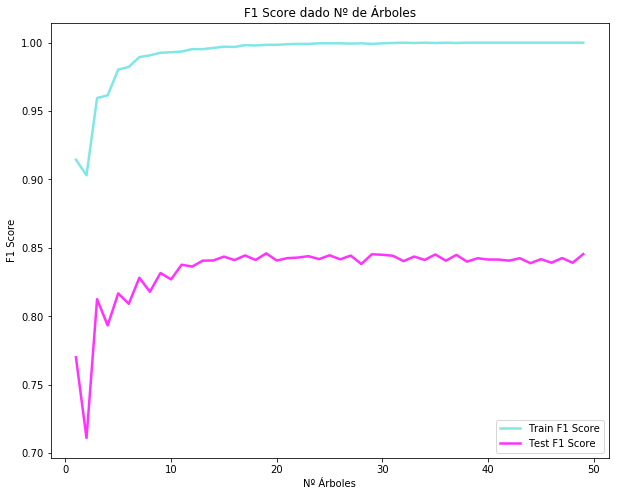

             precision    recall  f1-score   support

          0       0.94      0.89      0.91      1349
          1       0.94      0.96      0.95      2227

avg / total       0.94      0.94      0.94      3576

             precision    recall  f1-score   support

          0       0.71      0.68      0.70       584
          1       0.83      0.84      0.84      1041

avg / total       0.78      0.79      0.79      1625



In [9]:
scoreTrain = []
scoreTest = []

for ne in range(1,50):
    model = RandomForestClassifier(n_estimators=ne, random_state=15, max_depth=82, n_jobs=-1)
    model.fit(X_train, y_train)
    sTrain = f1_score(y_train, model.predict(X_train))
    sTest = f1_score(y_test, model.predict(X_test))
    scoreTrain.append(sTrain)
    scoreTest.append(sTest)
    print("RF %d %d %f" % (ne, 20, sTrain))
plt.figure(figsize=(10, 8))
plt.xlabel("Nº Árboles")
plt.ylabel("F1 Score")
plt.title("F1 Score dado Nº de Árboles")
plt.plot(np.array(range(1,50)), np.array(scoreTrain), lw=2.5, color=(0.5,0.9,0.9), label='Train F1 Score')
plt.plot(np.array(range(1,50)), np.array(scoreTest), lw=2.5, color=(1,0.2,1), label='Test F1 Score')
plt.legend()
plt.show()
model = RandomForestClassifier(n_estimators=ne, random_state=18, max_depth=10, n_jobs=-1)
model.fit(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

#### Respuesta

Se realizó una función que escogió los mejores parámetros basado en el f1Score del conjunto de entrenamiento. Dados estos parámetros, max_depth = 70, se realizo una ejecucion del modelo variando el número de estimadores.

Se observa un crecimiento sostenible del f1Score en el conjunto de entrenamiento. Esto ocurre de la misma forma en el conjunto de pruebas, con una variación mayor y con un valor menor que en el de entrenamiento. 

Así, se observa que existe overfitting. A través de classification_score, se observa la diferencia entre f1Score de la clase positiva y negativa, donde se mantiene la tendencia de diferencia en la eficiencia entre estas clases por la cantidad distinta de ejemplos disponibles

### (e) Entrene un ensamblador de árboles de múltiples niveles, mediante la técnica de AdaBoost. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (n estimators), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).

AB 1 0.999775
AB 2 1.000000
AB 3 1.000000
AB 4 1.000000
AB 5 1.000000
AB 6 1.000000
AB 7 1.000000
AB 8 1.000000
AB 9 1.000000
AB 10 1.000000
AB 11 1.000000
AB 12 1.000000
AB 13 1.000000
AB 14 1.000000
AB 15 1.000000
AB 16 1.000000
AB 17 1.000000
AB 18 1.000000
AB 19 1.000000
AB 20 1.000000
AB 21 1.000000
AB 22 1.000000
AB 23 1.000000
AB 24 1.000000
AB 25 1.000000
AB 26 1.000000
AB 27 1.000000
AB 28 1.000000
AB 29 1.000000
AB 30 1.000000
AB 31 1.000000
AB 32 1.000000
AB 33 1.000000
AB 34 1.000000
AB 35 1.000000
AB 36 1.000000
AB 37 1.000000
AB 38 1.000000
AB 39 1.000000
AB 40 1.000000
AB 41 1.000000
AB 42 1.000000
AB 43 1.000000
AB 44 1.000000
AB 45 1.000000
AB 46 1.000000
AB 47 1.000000
AB 48 1.000000
AB 49 1.000000


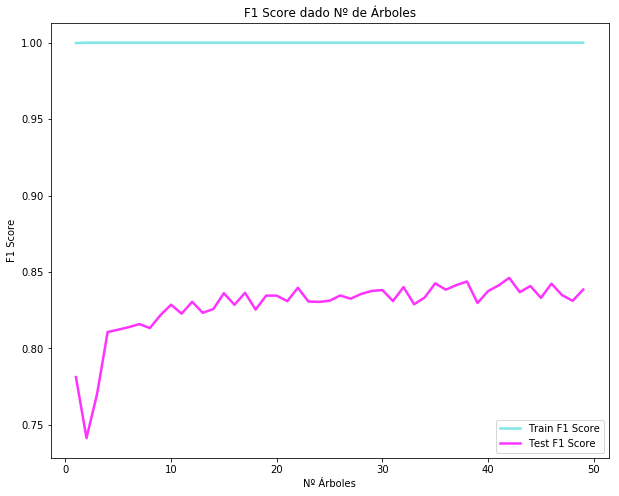

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1349
          1       1.00      1.00      1.00      2227

avg / total       1.00      1.00      1.00      3576

             precision    recall  f1-score   support

          0       0.65      0.69      0.67       584
          1       0.82      0.80      0.81      1041

avg / total       0.76      0.76      0.76      1625



In [10]:
scoreTrain = []
scoreTest = []
for ne in range(1,50):
    model = AdaBoostClassifier(base_estimator=Tree(max_depth=20), n_estimators=ne)
    model.fit(X_train, y_train)
    sTrain = f1_score(y_train, model.predict(X_train))
    sTest = f1_score(y_test, model.predict(X_test))
    scoreTrain.append(sTrain)
    scoreTest.append(sTest)
    print("AB %d %f" % (ne, sTrain))

plt.figure(figsize=(10, 8))
plt.xlabel("Nº Árboles")
plt.ylabel("F1 Score")
plt.title("F1 Score dado Nº de Árboles")
plt.plot(np.array(range(1,50)), np.array(scoreTrain), lw=2.5, color=(0.5,0.9,0.9), label='Train F1 Score')
plt.plot(np.array(range(1,50)), np.array(scoreTest), lw=2.5, color=(1,0.2,1), label='Test F1 Score')
plt.legend()
plt.show()

model = AdaBoostClassifier(base_estimator=Tree(max_depth=6), n_estimators=30)
model.fit(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

#### Respuesta

En esta ocasión se mantiene la misma tendencia que en d, sin embargo se noto una diferencia en el valor f1Score logrado, el cual disminuyó respecto al método anterior. Esto significa que usado adaboost el resultado empeoró.

Esto es contraintuitivo, ya que considerando que AdaBoost busca complementar las máquinas que lo conforman. Sin embargo, invesigando la implementación del algoritmo, AdaBoostClassifier implementa AdaBoost-SAMME, el cual le da mas peso a los puntos mal clasificados. De esta forma, lo que puede estar ocurriendo es que los outlierst estan siendo sobre representados.

Desde otro punto de vista, se observa que la variación respecto al número de estimadores también es diferente. Aquí el crecimiento es más errático, mientras que usando RandomForest este es más continuo. Esto se manifiesta de forma notoria en el conjunto de pruebas, dando a entender que RandomForest puede ser más confiable que AdaBoost en este caso.

### (f) Entrene alguna otra máquina de aprendizaje, elegida por usted, para resolver este problema. Elija los hiper-parámetros que estime convenientes intentando aumentar el F1-score obtenido por los algoritmos anteriores. Compare y analice estas 4 maneras de resolver el problema definido en b).

In [11]:
model= SVM()
model.set_params(C=20,kernel='sigmoid')
model.fit(X_train,y_train)
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       584
          1       0.64      1.00      0.78      1041

avg / total       0.41      0.64      0.50      1625



/Users/nano/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
model= SVM()
model.set_params(C=20,kernel='rbf')
model.fit(X_train,y_train)
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.59      0.56      0.57       584
          1       0.76      0.78      0.77      1041

avg / total       0.70      0.70      0.70      1625



#### Respuesta

Se entrenaron SVM's con distintas combinaciones de parámetros para tratar de igualar el desempeño logrado por las máquinas c(Arboles de clasificación), d(RandomForest) y e(AdaBoost). El resultado obtenido siempre fue menor que estas máquinas.

Los resultados obtenidos por AdaBoost y el arbol de clasificación fueron iguales, mientras que RandomForest fue el que tuvo mejores resultados.

El algoritmo de RandomForest implementa muestras bootstrap para cada árbol usado en la ejecución. Como se vio en la parte 1, la separación de las clases no es clara y además existe una gran cantidad de outliers. Dado esto, RandomForest tiene una ventaja en este sentido, ya que el uso de muestra bootstrap ayuda a la eliminación de estos outliers, ayudando a mejorar la predicción.

Por otro lado, el árbol de clasificación no implementa ningún método para luchar contra outliers o para corregir su prediccion en la medida que se ejecuta. AdaBoost si lo hace, sin embargo obtuvo los mismos resultados.



### (g) Defina un criterio para estimar la importancia de los distintos atributos en el ensamblado de Random Forest, impleméntelo sobre alguno de los ensambladores entrenados en d), haga un ranking de importancia de atributos ¿Es posible implementar este criterio sobre una técnica de boost como lo es AdaBoost ?

Lo primero es decir que el resultado de RandomForest es altamente dependiente de el dataset, por lo tanto, se intuye que la importancia de los parámetros debe ser dependiente del datataset.

El primer instinto es ver la variación del f1Score respecto de cada parámetro manteniendo el resto, para así ver su influcia en este valor.

In [13]:
model = RandomForestClassifier(n_estimators=20, random_state=18, n_jobs=-1)
model.fit(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1349
          1       1.00      1.00      1.00      2227

avg / total       1.00      1.00      1.00      3576

             precision    recall  f1-score   support

          0       0.69      0.72      0.71       584
          1       0.84      0.82      0.83      1041

avg / total       0.79      0.79      0.79      1625



RF 1 20 0.919724
RF 2 20 0.918841
RF 3 20 0.962615
RF 4 20 0.962673
RF 5 20 0.981598
RF 6 20 0.982297
RF 7 20 0.987671
RF 8 20 0.989179
RF 9 20 0.991269
RF 10 20 0.993029
RF 11 20 0.993730
RF 12 20 0.995729
RF 13 20 0.994168
RF 14 20 0.996177
RF 15 20 0.996182
RF 16 20 0.996853
RF 17 20 0.997082
RF 18 20 0.997977
RF 19 20 0.998429
RF 20 20 0.999102
RF 21 20 0.998878
RF 22 20 0.999551
RF 23 20 0.999327
RF 24 20 0.999551
RF 25 20 0.999327
RF 26 20 0.999776
RF 27 20 1.000000
RF 28 20 1.000000
RF 29 20 1.000000
RF 30 20 1.000000
RF 31 20 1.000000
RF 32 20 1.000000
RF 33 20 1.000000
RF 34 20 1.000000
RF 35 20 1.000000
RF 36 20 1.000000
RF 37 20 1.000000
RF 38 20 1.000000
RF 39 20 1.000000
RF 40 20 1.000000
RF 41 20 1.000000
RF 42 20 1.000000
RF 43 20 1.000000
RF 44 20 1.000000
RF 45 20 1.000000
RF 46 20 1.000000
RF 47 20 1.000000
RF 48 20 1.000000
RF 49 20 1.000000
RF 50 20 1.000000
RF 51 20 1.000000
RF 52 20 1.000000
RF 53 20 1.000000
RF 54 20 1.000000
RF 55 20 1.000000
RF 56 20 1.000000
R

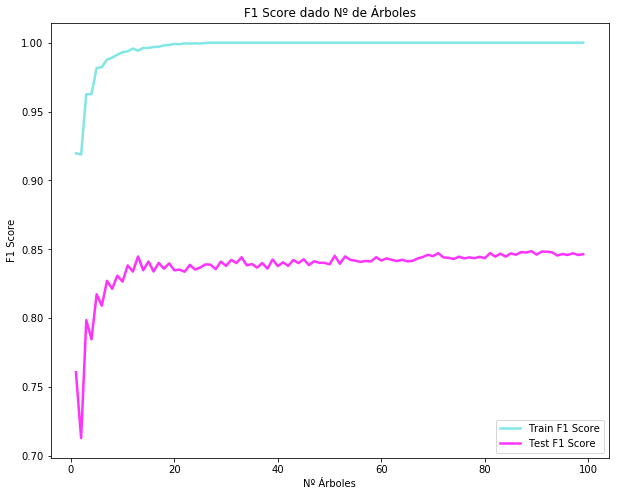

             precision    recall  f1-score   support

          0       0.93      0.89      0.91      1349
          1       0.94      0.96      0.95      2227

avg / total       0.94      0.94      0.94      3576

             precision    recall  f1-score   support

          0       0.72      0.68      0.70       584
          1       0.83      0.85      0.84      1041

avg / total       0.79      0.79      0.79      1625



In [14]:
scoreTrain = []
scoreTest = []
for ne in range(1,100):
    model = RandomForestClassifier(n_estimators=ne, random_state=18, max_depth=20, n_jobs=-1)
    model.fit(X_train, y_train)
    sTrain = f1_score(y_train, model.predict(X_train))
    sTest = f1_score(y_test, model.predict(X_test))
    scoreTrain.append(sTrain)
    scoreTest.append(sTest)
    print("RF %d %d %f" % (ne, 20, sTrain))
plt.figure(figsize=(10, 8))
plt.xlabel("Nº Árboles")
plt.ylabel("F1 Score")
plt.title("F1 Score dado Nº de Árboles")
plt.plot(np.array(range(1,100)), np.array(scoreTrain), lw=2.5, color=(0.5,0.9,0.9), label='Train F1 Score')
plt.plot(np.array(range(1,100)), np.array(scoreTest), lw=2.5, color=(1,0.2,1), label='Test F1 Score')
plt.legend()
plt.show()
model = RandomForestClassifier(n_estimators=100, random_state=18, max_depth=10, n_jobs=-1)
model.fit(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

RF 99 1 0.768328
RF 99 2 0.805317
RF 99 3 0.819051
RF 99 4 0.822114
RF 99 5 0.842668
RF 99 6 0.848007
RF 99 7 0.878007
RF 99 8 0.894005
RF 99 9 0.921762
RF 99 10 0.942346
RF 99 11 0.956984
RF 99 12 0.970921
RF 99 13 0.980628
RF 99 14 0.987925
RF 99 15 0.991487
RF 99 16 0.994612
RF 99 17 0.996630
RF 99 18 0.997303
RF 99 19 0.997528
RF 99 20 0.997977
RF 99 21 0.997752
RF 99 22 0.997752
RF 99 23 0.997752
RF 99 24 0.997528
RF 99 25 0.997752
RF 99 26 0.997302
RF 99 27 0.997302
RF 99 28 0.997302
RF 99 29 0.997302
RF 99 30 0.997302
RF 99 31 0.997302
RF 99 32 0.997302
RF 99 33 0.997302
RF 99 34 0.997302
RF 99 35 0.997302
RF 99 36 0.997302
RF 99 37 0.997302
RF 99 38 0.997302
RF 99 39 0.997302
RF 99 40 0.997302
RF 99 41 0.997302
RF 99 42 0.997302
RF 99 43 0.997302
RF 99 44 0.997302
RF 99 45 0.997302
RF 99 46 0.997302
RF 99 47 0.997302
RF 99 48 0.997302
RF 99 49 0.997302
RF 99 50 0.997302
RF 99 51 0.997302
RF 99 52 0.997302
RF 99 53 0.997302
RF 99 54 0.997302
RF 99 55 0.997302
RF 99 56 0.997302
R

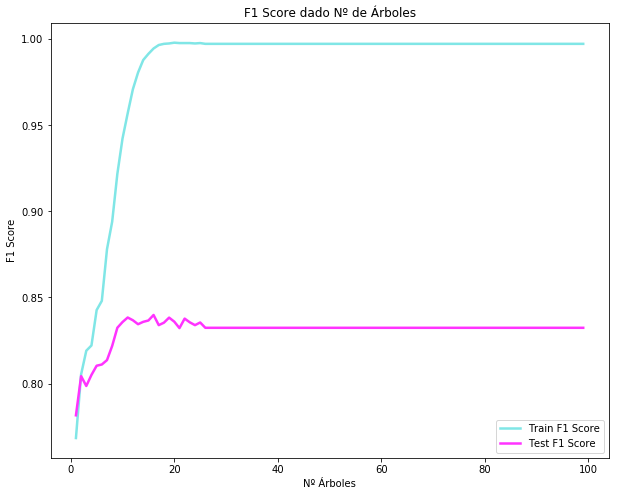

             precision    recall  f1-score   support

          0       0.99      1.00      1.00      1349
          1       1.00      1.00      1.00      2227

avg / total       1.00      1.00      1.00      3576

             precision    recall  f1-score   support

          0       0.70      0.73      0.71       584
          1       0.84      0.82      0.83      1041

avg / total       0.79      0.79      0.79      1625



In [15]:
scoreTrain = []
scoreTest = []
for md in range(1,100):
    model = RandomForestClassifier(n_estimators=18, random_state=18, max_depth=md, n_jobs=-1)
    model.fit(X_train, y_train)
    sTrain = f1_score(y_train, model.predict(X_train))
    sTest = f1_score(y_test, model.predict(X_test))
    scoreTrain.append(sTrain)
    scoreTest.append(sTest)
    print("RF %d %d %f" % (ne, md, sTrain))
plt.figure(figsize=(10, 8))
plt.xlabel("Nº Árboles")
plt.ylabel("F1 Score")
plt.title("F1 Score dado Nº de Árboles")
plt.plot(np.array(range(1,100)), np.array(scoreTrain), lw=2.5, color=(0.5,0.9,0.9), label='Train F1 Score')
plt.plot(np.array(range(1,100)), np.array(scoreTest), lw=2.5, color=(1,0.2,1), label='Test F1 Score')
plt.legend()
plt.show()
model = RandomForestClassifier(n_estimators=18, random_state=18, max_depth=100, n_jobs=-1)
model.fit(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=18, n_jobs=-1, bootstrap=False)
model.fit(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1349
          1       1.00      1.00      1.00      2227

avg / total       1.00      1.00      1.00      3576

             precision    recall  f1-score   support

          0       0.73      0.76      0.74       584
          1       0.86      0.84      0.85      1041

avg / total       0.81      0.81      0.81      1625



In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=18, n_jobs=-1, max_features=1)
model.fit(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1349
          1       1.00      1.00      1.00      2227

avg / total       1.00      1.00      1.00      3576

             precision    recall  f1-score   support

          0       0.73      0.72      0.72       584
          1       0.84      0.85      0.85      1041

avg / total       0.80      0.80      0.80      1625



In [18]:
model = RandomForestClassifier(n_estimators=100, random_state=18, n_jobs=-1, min_samples_leaf=5)
model.fit(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.93      0.86      0.89      1349
          1       0.92      0.96      0.94      2227

avg / total       0.92      0.92      0.92      3576

             precision    recall  f1-score   support

          0       0.72      0.68      0.70       584
          1       0.83      0.85      0.84      1041

avg / total       0.79      0.79      0.79      1625



#### Respuesta

En primera instancia, comparando los gráficos, se observa que el permitir mayor profundidad hace que el algoritmo converja de forma mas estable. De esta forma un resultado obtenido con un RandomForest de mayor profundidad da mas seguridad en sus resultados a futuro.

Por otro lado, el aumento en la cantidad de estimadores provocó que mejorara el algoritmo, de igual forma que aumentar la profundidad, sin embargo este crecimiento ocurre de forma mas inestable, dando a entender que la profundidad es un elemento vital en el comportamento del algoritmo.

El último experimento realizado, donde se pusieron ambos parámetros en 100, el máximo de los experimentos de aumento, muestra que el f1Score obtenido es exactamente igual a que si solo se aumenta la profundidad.

Dado todo lo anterior, en orden de importancia, el parámetro de profundidad tiene mas influencia que el parámetro de numero de estimadores ya que permite alcanzar el máximo potencial de la máquina.

Se realizó el experimento de eliminar bootstrasp y el f1Score empeoró, denotando lo diferenciador que es esta característica en el algorítmo.

Se observa que el parámetro max_features no influye. Sin embargo esto se puede deber a que la cantidad de atributos que describe el vino son pocos, tomando ya cada árbol un atributo.

El número mínimo de elemntos en las hojas tambien influye. Al aumentarlo mas de 3 se observa que empeora el f1Score. Esto se puede deber a que el algoritmo se va obligado a incluir elementos de la otra clase en la respuesta.

Respecto a la técnicas de boost, se mostró que los parámetros de máxima profundidad, la cantidad de arboles, tiene también una gran influencia en el conjunto de entrenamiento, pero no tanto así cuando se usa el conjunto de pruebas, por lo tanto, se concluye que este criterio no es aplicable a AdaBoost.